<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 500>
<h1 align=center><font size = 6,5>Final Project 3 </font></h1>

------------------------------------------------

# B. Import Library

In [2]:
# Import library dataframe
import numpy as np 
from numpy import mean 
import pandas as pd 

# Import library untuk visualisasi
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Import library untuk preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

# Import library untuk modelling/analysis
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error # Import library dataframe
import numpy as np 
from numpy import mean 
import pandas as pd 

# Import library untuk visualisasi
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Import library untuk preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

# Mengatur display agar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Import library untuk modelling/analysis
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Import library untuk model improvement
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

# Import Library untuk balancing
from sklearn.utils import resample

# Import library untuk model improvement
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

# Mengatur display agar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# C. Data Loading

Data Loading adalah proses membaca atau memuat data dari file sumber, folder atau aplikasi ke database atau aplikasi serupa. Pada project ini, data loading dilakukan dengan cara import file csv.

In [3]:
data_heart = pd.read_csv('C:/Users/ASUS WIN10/.ipynb_checkpoints/heart_failure_clinical_records_dataset.csv')

In [4]:
data_heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Keterangan dataset:**

Dataset ini berisi 23 kolom yang bertipe data integer, float. Masing-masing kolom memiliki arti tersendiri, yaitu sebagai berikut:

1. `age` - umur pasien
2. `anaemia` - apakah ada pengurangan haemoglobin
3. `creatinine_phosphokinase` - level enzim CPK dalam mcg/L
4. `diabetes` - apakah pasien punya riwayat diabetes
5. `ejection_fraction` - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. `high_blood_pressure` - apakah pasien punya darah tinggi
7. `platelets` - jumlah platelet di darah dalam kiloplatelets/mL
8. `serum_creatinine` - level serum creatinine di darah dalam mg/dL
9. `serum_sodium` - level serum sodium di darah dalam mEq/L
10. `sex` - apakah pasien pria atau wanita
11. `smoking` - apakah pasien merokok
12. `time` - waktu dalam hari untuk follow-up
13. `DEATH_EVENT` - apakah pasien sudah meninggal saat waktu follow-up

## Melihat ukuran dataset

In [5]:
data_heart.shape

(299, 13)

## Deskriptif Statistik

In [6]:
data_heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Mengecek info dataset ada kolom apa saja , mengecek type data, dll

In [7]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# D.Data Cleaning

Data cleaning (pembersihan data) adalah proses mengidentifikasi, mengkoreksi, dan menghapus kesalahan, ketidakcocokan, atau ketidaksesuaian dalam dataset agar data tersebut dapat digunakan dengan akurat dan andal dalam analisis, pemodelan, atau keperluan lainnya. Data cleaning adalah langkah penting dalam analisis data dan pengolahan data karena data yang tidak bersih atau cacat dapat menghasilkan hasil yang tidak benar dan tidak dapat diandalkan. 

## Pengecekan missing value

In [8]:
data_heart.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Pengecekan data duplikat

In [9]:
data_heart.duplicated().sum()

0

Mengecek tipe data datetime

In [10]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Kesimpulan dari proses Data Preprocessing

1. Dataset secara keseluruhan tidak memiliki data yang duplikat


# Exploratory Data Analysis

Exploratory Data Analysis (EDA) adalah metode eksplorasi data yang menggabungkan teknik statistik dan visualisasi data untuk memahami karakteristik, pola, dan hubungan dalam data. EDA membantu analis data merumuskan pemahaman awal tentang data sebelum melangkah ke tahap analisis lebih mendalam. Ini mencakup perhitungan statistik deskriptif, seperti rata-rata dan median, serta teknik visualisasi, seperti histogram dan scatter plot, untuk menggambarkan data dengan lebih baik dan mengidentifikasi tren, outlier, dan pertanyaan penelitian potensial. EDA adalah tahap awal penting dalam analisis data.

## 1. Visualisasi Data

### 1. apakah pasien yang meninggal karena penyakit jantung lebih banyak antara yang selamat

In [11]:
# Hitung jumlah pasien yang meninggal dan selamat
death_count = data_heart['DEATH_EVENT'].value_counts()

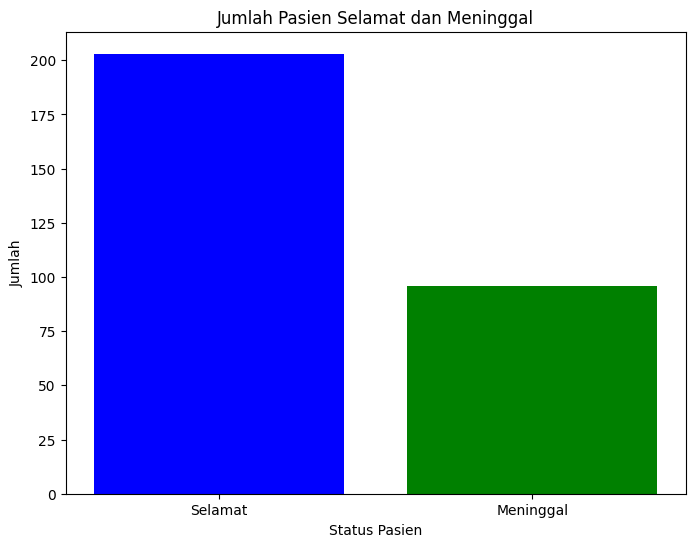

In [12]:
# Buat diagram batang
plt.figure(figsize=(8, 6))
plt.bar(death_count.index, death_count.values, color=['blue', 'green'])
plt.xticks([0, 1], ['Selamat', 'Meninggal'])
plt.xlabel('Status Pasien')
plt.ylabel('Jumlah')
plt.title('Jumlah Pasien Selamat dan Meninggal')
plt.show()

Pada Grafik diatas jumlah pasien yang meninggal akibat gagal jantung sebanyak 96, dan sedangkan pasien yang selamat terdapat 203.

kesimpulan:

Ternyata pasien yang selamat lebih besar dibandingkan pasien yang meninggal, dan grafik diatas bahwa pasien yang meniggal sedikit

### 2. perbandingan antara pasien pria dan wanita yang mengalami gagal jantung dan penyakit jantung

In [13]:
# Hitung jumlah pasien pria dan wanita yang menderita gagal jantung
gender_failure_count = data_heart[data_heart['DEATH_EVENT'] == 1]['sex'].value_counts()

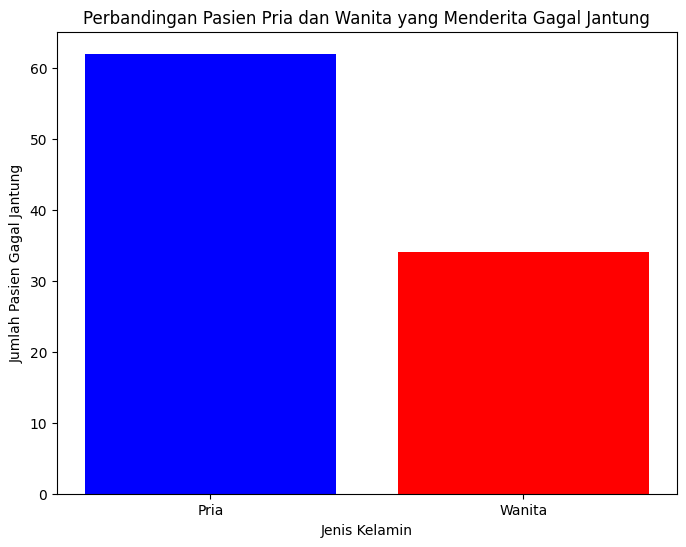

In [14]:
# Ubah kode jenis kelamin menjadi keterangan yang lebih deskriptif
gender_failure_count.index = gender_failure_count.index.map({0: 'Wanita', 1: 'Pria'})

# Buat diagram batang
plt.figure(figsize=(8, 6))
plt.bar(gender_failure_count.index, gender_failure_count.values, color=['blue', 'red'])
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pasien Gagal Jantung')
plt.title('Perbandingan Pasien Pria dan Wanita yang Menderita Gagal Jantung')
plt.show()

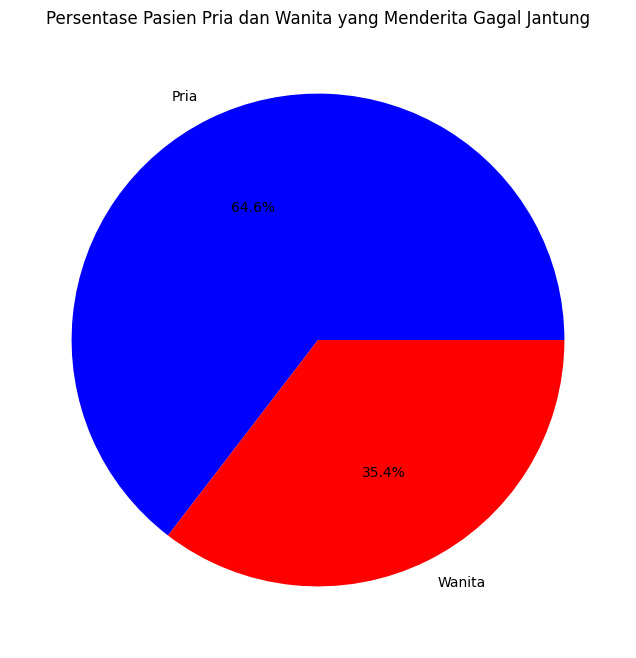

In [15]:
# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_failure_count, labels=gender_failure_count.index, autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Persentase Pasien Pria dan Wanita yang Menderita Gagal Jantung')
plt.show()

**Kesimpulan** 

Berdasarkan visualisasi diatas, maka dapat disimpulkan bahwa perbadingan pasien pria atau wanita yang mengalami gagal jatung, lebih besar pasien pria dibandingkan dengan pasien wanta. Selain itu, diperoleh informasi bahwa:
1. pria 
    - Banyaknya pasien pria yang mengalami gagal jantung terdapat 62 jiwa  <br>
    - Dan presentase yang di dapatkan oleh pasien pria adalah 64.6%  <br>
2. wanita 
    - Sedangkan banyaknya pasien wanita yang mengalami gagal jantung terdapat 34 jiwa  <br>
    -  Dengan presentase yang di dapatkan oleh pasien wanita adalah 35.4%  <br>

## E.2. Analisis Korelasi
Analisis korelasi merupakan salah satu teknik statistik yang digunakan untuk menganalisis hubungan antara dua variabel atau lebih yang bersifat kuantitatif. Bahwa adanya perubahan sebuah variabel disebabkan atau akan diikuti dengan perubahan variabel lain.

In [16]:
df_cor = data_heart.loc[:,['age','anaemia','creatinine_phosphokinase','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time','DEATH_EVENT']]
df_cor.head()

heat_map_modeling = ['age','anaemia','creatinine_phosphokinase','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time','DEATH_EVENT']

#### E.2.1. Melakukan proses label encoding

In [17]:
# Membuat objek LabelEncoder untuk melakukan encoding pada setiap kolom.
label_encoder = preprocessing.LabelEncoder()

# Mengambil tipe data object pada dataset dan di simpan di df_encode_cor
df_category = df_cor.select_dtypes(include='object')
df_encode_cor = df_cor.copy()

for column in df_category.columns:
    df_encode_cor[column] = label_encoder.fit_transform(df_cor[column])

In [18]:
df_encode_cor.head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,20,0,327000.00,2.7,116,0,0,8,1


#### 2.2. Membuat visualisasi heatmap berdasarkan df_cor

In [19]:
# Membuat fungsi heat_map dengan 2 parameter
# nama df adalah nama datasetnya, list kolom adalah list korelasi yang ingin di cek
def heat_map(nama_df,list_kolom): 
    df_heatmap = nama_df[list_kolom] #Memasukkan data kolom tersebut kedalam variabel baru
    plt.figure(figsize=(20,23)) #Mengatur ukuran
    
    #Membuat heat map dengan menampilkan nilai dari korelasi
    sns.heatmap(df_heatmap.corr(), 
                annot=True, 
                cmap="pink", 
                linewidths=.5, 
                linecolor='black', 
                square=True) 

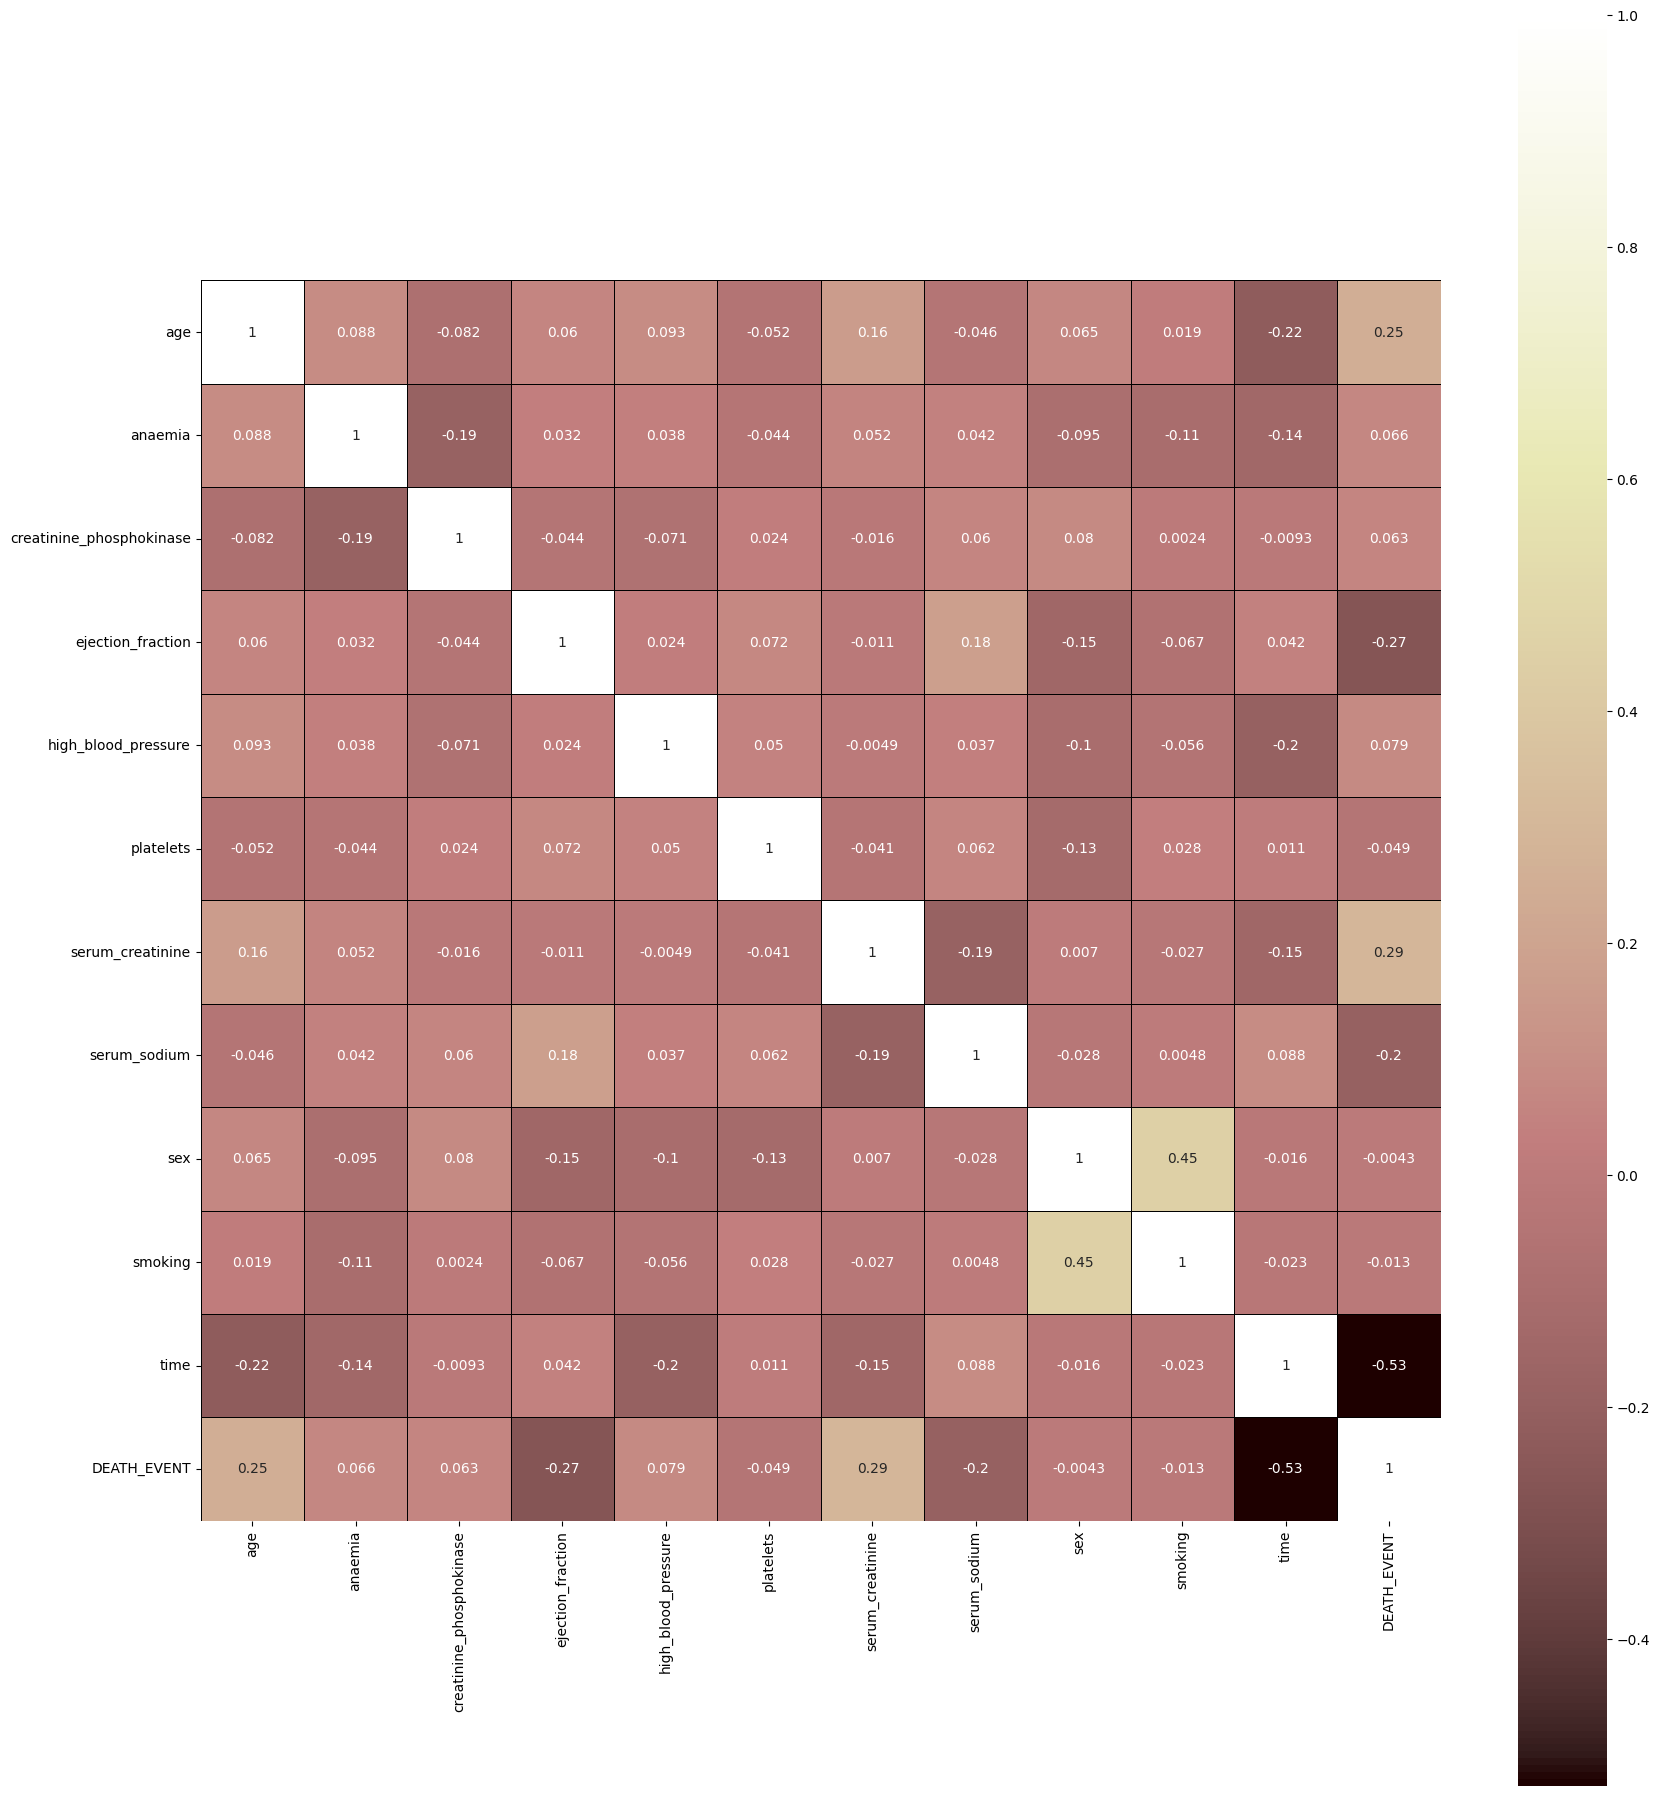

In [20]:
heat_map(df_encode_cor,heat_map_modeling)

**Keterangan:**

Berdasarkan heatmap, dipilih beberapa kolom yang memiliki korelasi cukup tinggi yang kemudian nantinya digunakan untuk variabel X dan Y pada modelling. Kolom tersebut diantaranya adalah sebagai berikut:
1. `age` - dengan korelasi 0.25
2. `anaemia` - dengan korelasi 0.066
3. `creatinine_phosphokinase` - dengan korelasi 0.063 
4. `high_blood_pressure` - dengan korelasi 0.079
5. `serum_creatinine` - dengan korelasi 0.29
6. `DEATH_EVENT` - dengan korelasi 1.00

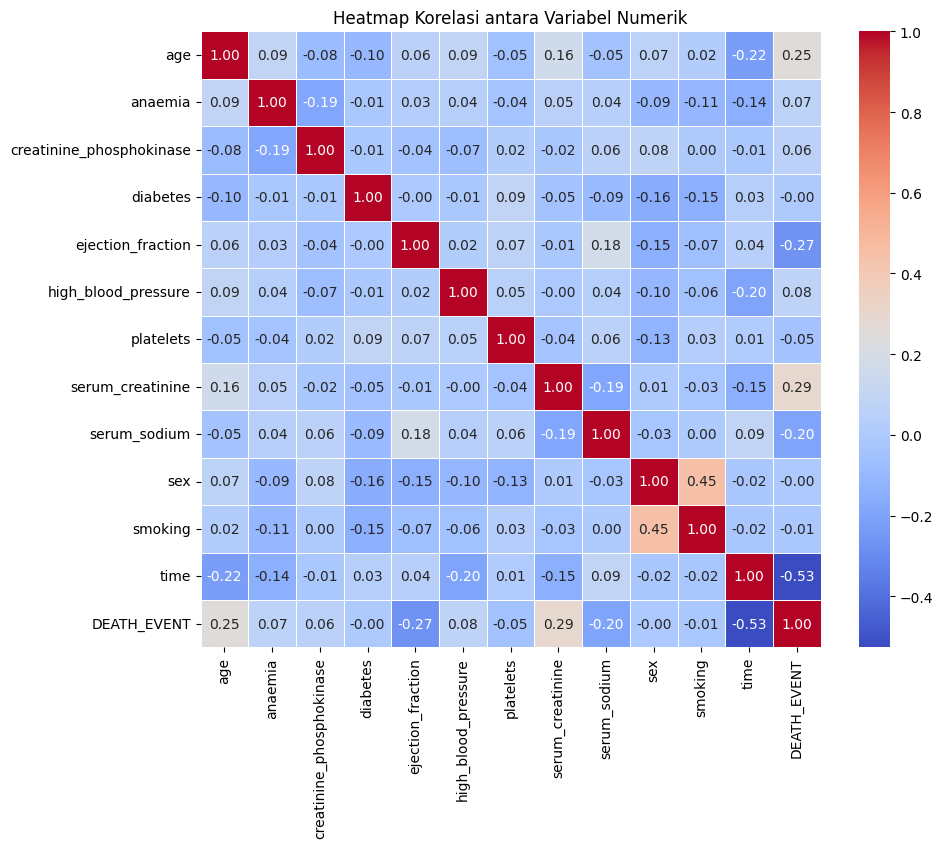

In [21]:
# Menghitung korelasi antara variabel-variabel numerik dalam dataset
correlation_matrix = data_heart.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi antara Variabel Numerik')
plt.show()

**Keterangan:**

Berdasarkan heatmap, dipilih beberapa kolom yang memiliki korelasi cukup tinggi yang kemudian nantinya digunakan untuk variabel X dan Y pada modelling. Kolom tersebut diantaranya adalah sebagai berikut:
1. `age` - dengan korelasi 0.25
2. `anaemia` - dengan korelasi 0.07
3. `creatinine_phosphokinase` - dengan korelasi 0.06
5. `high_blood_pressure` - dengan korelasi 0.08
5. `serum_creatinine` - dengan korelasi 0.29
6. `DEATH_EVENT` - dengan korelasi 1.00

# F. Mencari Central Tendency & Measure of Spread 
1. Central Tendency merupakan nilai yang menunjukkan titik tengah dari suatu dataset untuk mengetahui dimana posisi banyak nilai data berkumpul di dalam distribusi. Nilai Mean, Median, dan Modus adalah ukuran Central Tendency yang paling umum digunakan. 
2. Measures of Spread didefinisikan sebagai cara untuk mendeskripsikan data dengan menjelaskan seberapa menyebar data kita. Cara yang sering digunakan adalah range, varian, dan standar deviasi.

Pada project ini, kami menggunakan kolom yang sudah dipilih dengan tipe data integer untuk dicari central tendency dan Measure of Spread nya.

In [22]:
df_central = data_heart.loc[:,['age', 'ejection_fraction', 'serum_creatinine', 'platelets']]
df_central.head()


,age,ejection_fraction,serum_creatinine,platelets
0,75.0,20,1.9,265000.00
1,55.0,38,1.1,263358.03
2,65.0,20,1.3,162000.00
3,50.0,20,1.9,210000.00
4,65.0,20,2.7,327000.00


In [23]:
#Menghitung mean, median, modus, range, variansi, dan Standard Deviasi
for column in df_central:
    mean = df_central[column].mean()
    median = df_central[column].median()
    mode = df_central[column].mode()[0]
    min_value = df_central[column].min()
    max_value = df_central[column].max()
    range_value = max_value - min_value
    variance = df_central[column].var()
    std_dev = df_central[column].std()
    
#Print hasilnya
    print(f"Nama Kolom: {column}")
    print(f"Mean: {mean:.3f}")
    print(f"Median: {median:.3f}")
    print(f"Modus: {mode:.3f}")
    print(f"Range: {range_value:.3f}")
    print(f"Variansi: {variance:.3f}")
    print(f"Standard Deviasi: {std_dev:.3f}")
    print("  ")

Nama Kolom: age
Mean: 60.834
Median: 60.000
Modus: 60.000
Range: 55.000
Variansi: 141.486
Standard Deviasi: 11.895
  
Nama Kolom: ejection_fraction
Mean: 38.084
Median: 38.000
Modus: 35.000
Range: 66.000
Variansi: 140.063
Standard Deviasi: 11.835
  
Nama Kolom: serum_creatinine
Mean: 1.394
Median: 1.100
Modus: 1.000
Range: 8.900
Variansi: 1.070
Standard Deviasi: 1.035
  
Nama Kolom: platelets
Mean: 263358.029
Median: 262000.000
Modus: 263358.030
Range: 824900.000
Variansi: 9565668749.449
Standard Deviasi: 97804.237
  


Pada data central  masing-masing kolom terdapat nilai mean,median,modus,range,variansi,dan stadart deviasi yang berbebeda hasilnya

# G. Cardinality

Cardinality / Kardinalitas adalah ukuran keunikan data pada kolom tertentu dari suatu table database. Tujuan kita adalah mengurangi cardinality untuk membuat model yang lebih konsisten dan tidak over-fit. Kita memastikan semua label unik yang ada pernah dilihat model saat training.

In [24]:
df_card = data_heart.loc[:,['age', 'anaemia', 'ejection_fraction', 'serum_creatinine', 'platelets', 'creatinine_phosphokinase', 'high_blood_pressure', 'DEATH_EVENT']]
df_card.head()

,age,anaemia,ejection_fraction,serum_creatinine,platelets,creatinine_phosphokinase,high_blood_pressure,DEATH_EVENT
0,75.0,0,20,1.9,265000.00,582,1,1
1,55.0,0,38,1.1,263358.03,7861,0,1
2,65.0,0,20,1.3,162000.00,146,0,1
3,50.0,1,20,1.9,210000.00,111,0,1
4,65.0,1,20,2.7,327000.00,160,0,1


In [25]:
print('Jumlah kategori dalam variabel age                         : {}'.format(len(df_card.age.unique())))
print('Jumlah kategori dalam variabel ejection_fraction	          : {}'.format(len(df_card.ejection_fraction.unique())))
print('Jumlah kategori dalam variabel serum_creatinine            : {}'.format(len(df_card.serum_creatinine.unique())))
print('Jumlah kategori dalam variabel platelets                   : {}'.format(len(df_card.platelets.unique())))
print('Jumlah kategori dalam variabel anaemia                     : {}'.format(len(df_card.anaemia.unique())))
print('Jumlah kategori dalam variabel creatinine_phosphokinase    : {}'.format(len(df_card.creatinine_phosphokinase.unique())))
print('Jumlah kategori dalam variabel high_blood_pressure         : {}'.format(len(df_card.high_blood_pressure.unique())))
print('Jumlah kategori dalam variabel DEATH_EVENT                 : {}'.format(len(df_card.DEATH_EVENT.unique())))

Jumlah kategori dalam variabel age                         : 47
Jumlah kategori dalam variabel ejection_fraction	          : 17
Jumlah kategori dalam variabel serum_creatinine            : 40
Jumlah kategori dalam variabel platelets                   : 176
Jumlah kategori dalam variabel anaemia                     : 2
Jumlah kategori dalam variabel creatinine_phosphokinase    : 208
Jumlah kategori dalam variabel high_blood_pressure         : 2
Jumlah kategori dalam variabel DEATH_EVENT                 : 2


**Keterangan:**

Dapat dilihat bahwa juumlah kategori (unique value) dari platelets dan creatinine_phosphokinase sangat banyak atau biasa disebut dengan istilah high cardinality. 

In [26]:
df_central.head()

,age,ejection_fraction,serum_creatinine,platelets
0,75.0,20,1.9,265000.00
1,55.0,38,1.1,263358.03
2,65.0,20,1.3,162000.00
3,50.0,20,1.9,210000.00
4,65.0,20,2.7,327000.00


In [27]:
print('Jumlah kategori dalam variabel age                         : {}'.format(len(df_card.age.unique())))
print('Jumlah kategori dalam variabel ejection_fraction	          : {}'.format(len(df_card.ejection_fraction.unique())))
print('Jumlah kategori dalam variabel serum_creatinine            : {}'.format(len(df_card.serum_creatinine.unique())))
print('Jumlah kategori dalam variabel platelets                   : {}'.format(len(df_card.platelets.unique())))

Jumlah kategori dalam variabel age                         : 47
Jumlah kategori dalam variabel ejection_fraction	          : 17
Jumlah kategori dalam variabel serum_creatinine            : 40
Jumlah kategori dalam variabel platelets                   : 176


# Undersampling

Undersampling adalah salah satu teknik yang digunakan dalam pemrosesan data ketika kita memiliki ketidakseimbangan kelas dalam dataset. Ini adalah pendekatan yang digunakan untuk mengatasi situasi di mana satu kelas dalam dataset memiliki jumlah sampel yang jauh lebih sedikit daripada kelas lainnya.

In [28]:
# membuat 2 dataframe dari majority dan minority class 
df_majority =df_card[(df_card['DEATH_EVENT']==0)] 
df_minority = df_card[(df_card['DEATH_EVENT']==1)] 

# upsample minority class
df_majority_undersampling = resample(df_majority, replace = True, n_samples = 31877, random_state = 42)

# Combine majority class with upsampled minority class
df_undersampling = pd.concat([df_majority_undersampling, df_minority]) 

In [29]:
df_card['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

# I. Analisis

Pada tahap ini berisi beberapa kondisi yang kami buat dengan tujuan untuk memaksimalkan hasil modelling nanti beserta tahapan-tahapan lainnya agar kondisi-kondisi tersebut semakin optimal. Diantaranya adalah mengindentifikasi data, menghandle outliers, dan menghitung nilai kuartil.

## J.1. Kondisi 
Memilih kolom dengan korelasi paling tinggi berdasarkan analisis korelasi yang telah dilakukan. Kolom yang dipilih sudah melalui proses encoding, undersampling dan feature scaling.

In [61]:
df_kondisi = df_card.copy()
df_kondisi.head()

,age,anaemia,ejection_fraction,serum_creatinine,platelets,creatinine_phosphokinase,high_blood_pressure,DEATH_EVENT
0,75.0,0,20,1.9,265000.00,582,1,1
1,55.0,0,38,1.1,263358.03,7861,0,1
2,65.0,0,20,1.3,162000.00,146,0,1
3,50.0,1,20,1.9,210000.00,111,0,1
4,65.0,1,20,2.7,327000.00,160,0,1


Mengidentifikasi data apakah berdistribusi normal atau skewness

In [62]:
# Membuat fungsi untuk visualisasi histogram dan boxplot dengan 2 parameter
def diagnostic_plots(df_kondisi, variable):
    # Mengatur ukuran
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_kondisi[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_kondisi[variable])
    plt.title('Boxplot')

    plt.show()

In [63]:
df_kondisi['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [64]:
select = df_kondisi[['DEATH_EVENT']]
select.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


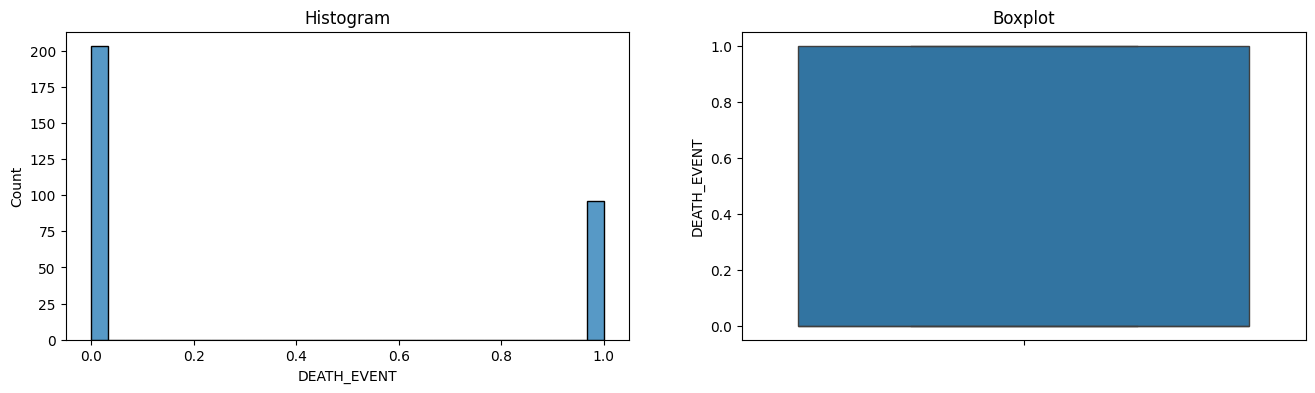

Skewness Value :  0.7703488154389491


In [65]:
diagnostic_plots(select, 'DEATH_EVENT')
print('Skewness Value : ', select['DEATH_EVENT'].skew())

Ternyata data tersebut memiliki Skewness Value yang relatif kecil yaitu sebesar 0.77, selanjutnya cek outliersnya.

In [66]:
# Mencari tahu data yang outliers dengan mendefinisikan fungsi
continous_features = ['DEATH_EVENT']  
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('Pada kolom {}, jumlah outliernya adalah {}'.format(each_feature, len(outliers)))
        if drop:
            df_undersampling.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

In [67]:
outliers(df_kondisi[continous_features])

Pada kolom DEATH_EVENT, jumlah outliernya adalah 0


In [68]:
from scipy.stats import skew

Skewness dari atribut "age" adalah 0.42


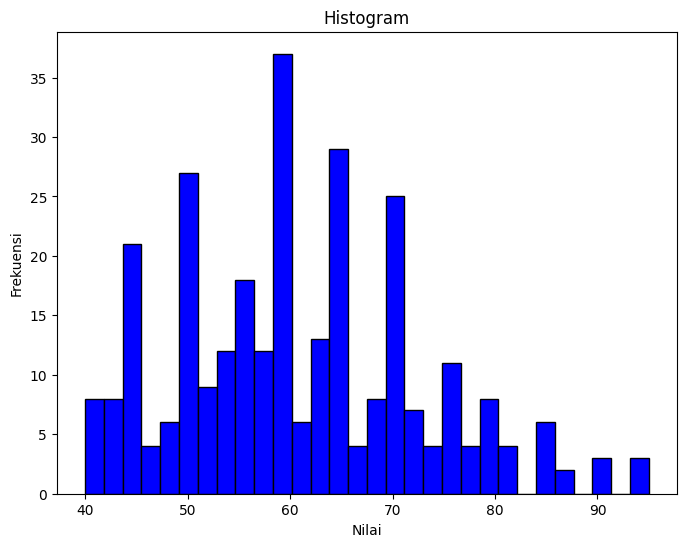

In [69]:
# Pilih atribut klinis yang akan dievaluasi
selected_attribute = 'age'

# Hitung skewness
skewness = skew(df_cor[selected_attribute])

# Tampilkan hasil skewness
print(f'Skewness dari atribut "{selected_attribute}" adalah {skewness:.2f}')

# Visualisasi histogram
plt.figure(figsize=(8, 6))
plt.hist(df_cor[selected_attribute], bins=30, color='blue', edgecolor='black')
plt.title(f'Histogram')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

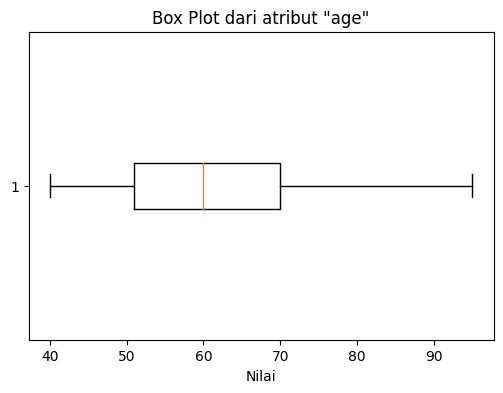

In [70]:
# Buat ouliers dengan diagram box plot
plt.figure(figsize=(6, 4))
plt.boxplot(df_kondisi[selected_attribute], vert=False)
plt.title(f'Box Plot dari atribut "{selected_attribute}"')
plt.xlabel('Nilai')
plt.show()

# K. Modelling

## K.1. Ensemble

### K.1.1. Pendefinisian Model Dengan Random Forest
Mendefinisikan model random forest

### K.1.2. Pelatihan Model

Pelatihan model adalah proses untuk menjalankan sebuah algoritma machine learning untuk dapat mengolah dataset di dalamnya yang sudah terbagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola maupun output tertentu.

In [41]:
# Pisahkan atribut dan label
X = df_kondisi.drop('DEATH_EVENT', axis=1)
y = df_kondisi['DEATH_EVENT'].values

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()

In [43]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [44]:
# Buat model Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [45]:
# Latih model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
# Memprediksi data uji
y_pred = rf_classifier.predict(X_test)

## Evaluasi Model

In [47]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

Akurasi: 0.75


In [48]:
confusion = confusion_matrix(y_test, y_pred)
print(f'Matriks Konfusi:\n{confusion}')

Matriks Konfusi:
[[31  4]
 [11 14]]


In [49]:
classification = classification_report(y_test, y_pred)
print(f'Laporan Klasifikasi:\n{classification}')

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        35
           1       0.78      0.56      0.65        25

    accuracy                           0.75        60
   macro avg       0.76      0.72      0.73        60
weighted avg       0.75      0.75      0.74        60



### Melihat hasil prediksi dengan data aktual

In [50]:
y_test

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [51]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [52]:
kondisi = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
kondisi.head()

,Actual,Predict
0,0,1
1,0,0
2,1,0
3,1,1
4,0,0


### Membuat Visualisasi Confusion Matrix Random Forest

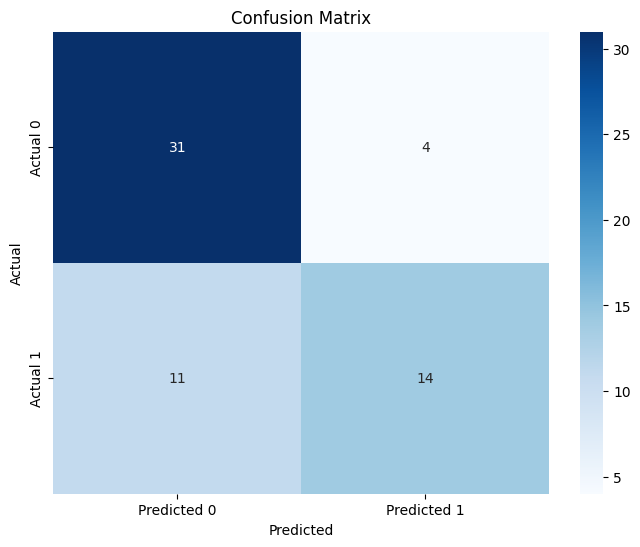

In [53]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

c:\Users\ASUS WIN10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


No Skill ROC AUC Score            = 0.5
RandomForestClassifier ROC AUC Score = 0.46514285714285714


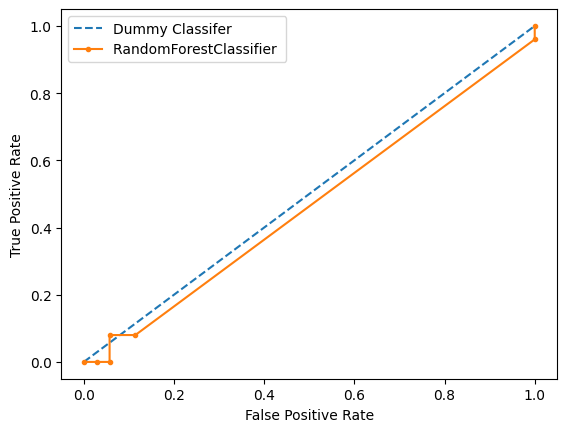

In [54]:
ns_probs = [0 for _ in range(len(y_test))]
rf_probs = rf_classifier.predict_proba(x_test)
rf_probs = rf_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

print('No Skill ROC AUC Score            =', ns_auc)
print('RandomForestClassifier ROC AUC Score =', rf_auc)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer')
plt.plot(rf_fpr, rf_tpr, marker='.', label='RandomForestClassifier ')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

# Model Improvement

"Peningkatan model" (model improvement) dalam konteks analisis data atau pembelajaran mesin adalah proses meningkatkan kualitas model statistik atau pembelajaran mesin yang Anda buat. Peningkatan ini dapat berarti meningkatkan kinerja model, mengurangi overfitting, mengoptimalkan parameter, atau mengatasi masalah lain yang mungkin muncul selama pengembangan model.Pada project ini digunakan metode model improvement bernama **GridSearchCV**.

## Mengoptimalkan model menggunakan GridSearchCV

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd



In [73]:
# Assuming df_kondisi is DataFrame

# Extracting features (x) and target variable (y)
x = df_kondisi.drop(columns=['DEATH_EVENT'], axis=1).values
y = df_kondisi['DEATH_EVENT'].values

# Defining the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Adjust these values based on your needs
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Creating a Random Forest Classifier object
rf = RandomForestClassifier()

# Using grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=9)
grid_search.fit(x, y)

# Displaying the best hyperparameters and the mean cross-validated score
print("Best Hyperparameters:", grid_search.best_params_)
print("Mean Cross-Validated Score:", grid_search.best_score_)


Best Hyperparameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Mean Cross-Validated Score: 0.7492572786690435
